# CS171 - Spring 2019 - Assignment 1
### Instructor: Vagelis Papalexakis

In this first assignment you will explore a dataset, visualizing the dataset in various ways, and doing a preliminary analysis on the data. 

For this assignment we are going to use the functionality of Pandas (the library, *not* the unbearably cute animal): https://pandas.pydata.org/ in order to manipulate datasets.
In addition to Pandas, we are going to use Matplotlib (https://matplotlib.org/) and Numpy (http://www.numpy.org/) and you may also find Seaborn (https://seaborn.pydata.org/) useful for some data visualization.

Unless you are explicitly asked to *implement* a particular functionality, you may assume that you may use an existing implementation from the libraries above (or some other library that you may find, as long as you *document* it).

Before you start, make sure you have installed all those packages in your local Jupyter instance, as follows:

conda install numpy pandas matplotlib seaborn

## Academic Integrity
Each assignment should be done  individually. You may discuss general approaches with other students in the class, and ask questions to the TAs, but  you must only submit work that is yours . If you receive help by any external sources (other than the TA and the instructor), you must properly credit those sources, and if the help is significant, the appropriate grade reduction will be applied. If you fail to do so, the instructor and the TAs are obligated to take the appropriate actions outlined at http://conduct.ucr.edu/policies/academicintegrity.html . Please read carefully the UCR academic integrity policies included in the link.


In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import random as rand

## Question 0: Getting real data [0%] 

In this assignment you are going to use data from the UCI Machine Learning repository ( https://archive.ics.uci.edu/ml/index.php ). In particular, you are going to use the famous Iris dataset: https://archive.ics.uci.edu/ml/datasets/Iris


In [66]:
data_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'label']
data = pd.read_csv('iris.data', 
                   names = data_names)
data.head()

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Question 1: Data Visualization [20%]


### Question 1a: Scatterplots [10%]
1. Plot the scatterplot of all pairs of features and color the points by class label [5%]
2. Which pair of features is (visually) the most correlated?  [2.5%]
3. Can you think of a reason why looking at this plot would be useful in a task where we would have to classify flowers by label? [2.5%]

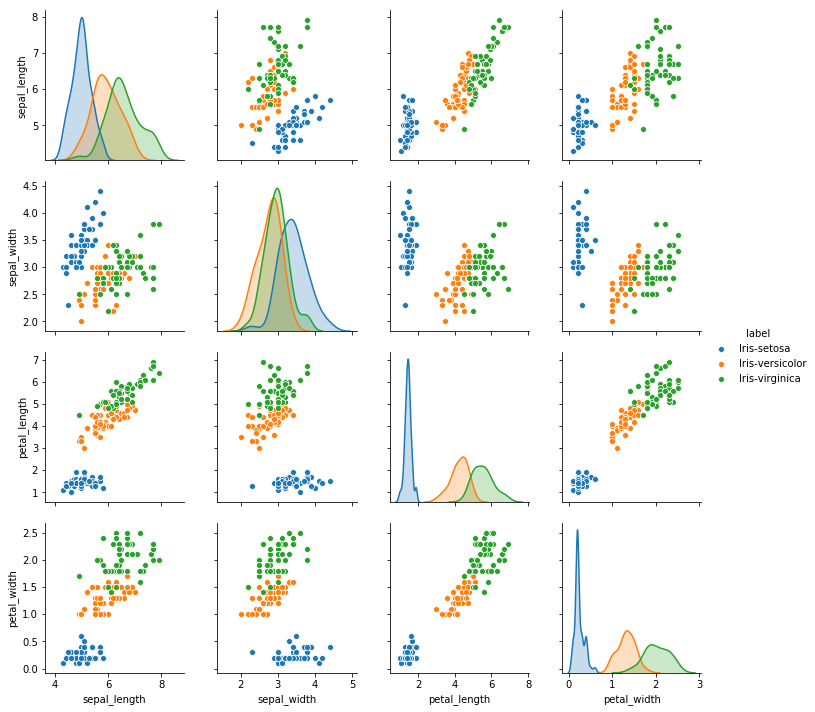

In [67]:
#your code here
import seaborn as sns
sns.pairplot(data,hue=
             'label')

Your answer here:
2. (petal_length,petal_width)   (sepal_length,petal_length) 
3. From the plots we can see that Iris-virginica can be easily classified as it has the maximum petal_width and petal_length out of the three classes.Although there is an overlap in the sepal_length and sepal_width, there is a clear distinction between the Iris-versicolor and the Iris-virginica on the petal_length and petal_width which can classify these two classes of flowers.

### Question 1b: Boxplot and Histogram [10%]

1. Plot the boxplot for each feature of the dataset (you can put all boxplots on a single figure) [4%]
2. Plot the histogram only for petal length [4%]
3. Does the histogram for petal length give more information than the boxplot? If so, what information? [2%]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D96C0BBE80>]],
      dtype=object)

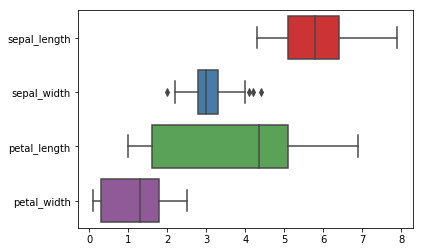

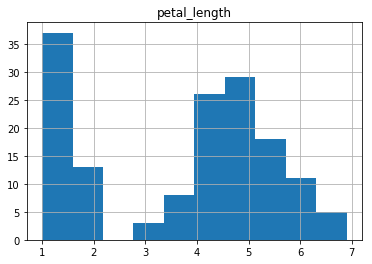

In [68]:
#your code here

ax = sns.boxplot(data=data, orient="h", palette="Set1")
#Your answer here:
data.hist(column='petal_length')

3.Box plots show if a dataset is symmetric/anti-symmetric and whther it is right skewed or left skewed. The shape of th symmetry is not known which is where the histogram comes to use and here the histogram shows how the frequencies are distributed across the bins and also the peaks can be identified in a histogram which is not seen in case of a boxplot.

## Question 2: Distance computation [40%]



### Question 2a: Implement the Lp distance function [20%]
1. Write code that implements the Lp distance function between two data points as we saw it in class [15%]
2. Verify that it is correct by comparing it for p=2 against an existing implementation in Numpy for the two selected data points below. Note that the difference of the distances may not be exactly 0 due to numerical precision issues. [5%]

In [69]:
#your code here
from scipy.spatial import distance


def minkowski_distance(x,y,p):
    return (pow(sum(pow(abs(a-b),p) for a,b in zip(x,y)),1/p))

def verify(x,y,p):
    d1=distance.minkowski(x,y,p)
    d2=minkowski_distance(x,y,p)
    return d2-d1

vector1=np.array(data.loc[1,'sepal_length':'petal_width'])

vector2=np.array(data.loc[2,'sepal_length':'petal_width'])
p=2
print ('Minkowski Distance',minkowski_distance(vector1,vector2,p))
print('Difference',verify(vector1,vector2,p))

Minkowski Distance 0.30000000000000016
Difference 0.0


### Question 2b: Compute the distance matrix between all data points [20%]
1. Compute an $N\times N$ distance matrix between all data points (where $N$ is the number of data points) [5%]
2. Plot the above matrix and include a colorbar. [5%]
3. What is the minimum number of distance computations that you can do in order to populate every value of this matrix? (note: it is OK if in the first two questions you do all the $N^2$ computations) [5%]
4. Note that the data points in your dataset are sorted by class. What do you observe in the distance matrix? [5%]

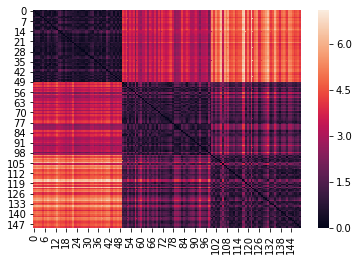

In [70]:
#your code hereimport math

from scipy.spatial import distance_matrix
data2_df = pd.DataFrame(data, columns=['sepal_length','sepal_width','petal_length','petal_width'],index=None)
distance_matrix_data2_df=pd.DataFrame(distance_matrix(data2_df.values, data2_df.values), index=data2_df.index, columns=data2_df.index)
sns.heatmap(distance_matrix_data2_df)
label = ["Setosa","Versicolor","Virginica"]
    

    

    


Your answer here:
3. N*(N+1)/2 computations
4. We can see the hierarchical clustering of the datapoints as this is a sorted matrix(sorted by class). We see that there are three clusters corresponding to the three calsses in the iris dataset one which is linearly separable(darkest) and two which are almost similar but have their respective distances from the darkest cluster.

## Question 3: Data Sampling [40%]

Sometimes datasets are too big, or come in a streaming fashion, and it is impossible for us to process every single data point, so we have to resort to sampling methods. In this question, you will implement the popular "reservoir sampling" method, which is mostly used to obtain a uniform random sample of a data stream. Subsequently, you will experiment with sampling directly all the data and conducting stratified sampling (by class label) and observe the results in the data distribution.

### Question 3a: Reservoir Sampling [20%]
1. Implement reservoir sampling as we saw it in class. Create a 'reservoir_sampling' function because it will be useful for the next question. [15%]
2. Run reservoir sampling with reservoir size $M = 15$ and plot the histogram of the petal length feature for the sampled dataset [5%]

Following are m randomly selected items
[6.1, 2.6, 5.6, 1.4, 'Iris-virginica'] [5.0, 2.3, 3.3, 1.0, 'Iris-versicolor'] [6.3, 2.8, 5.1, 1.5, 'Iris-virginica'] [6.2, 2.8, 4.8, 1.8, 'Iris-virginica'] [5.0, 3.2, 1.2, 0.2, 'Iris-setosa'] [5.4, 3.9, 1.7, 0.4, 'Iris-setosa'] [6.1, 2.9, 4.7, 1.4, 'Iris-versicolor'] [7.2, 3.6, 6.1, 2.5, 'Iris-virginica'] [5.5, 4.2, 1.4, 0.2, 'Iris-setosa'] [5.2, 3.4, 1.4, 0.2, 'Iris-setosa'] [5.7, 4.4, 1.5, 0.4, 'Iris-setosa'] [5.0, 3.4, 1.6, 0.4, 'Iris-setosa'] [5.6, 3.0, 4.5, 1.5, 'Iris-versicolor'] [7.2, 3.0, 5.8, 1.6, 'Iris-virginica'] [5.8, 4.0, 1.2, 0.2, 'Iris-setosa'] 
histogram of the data
df after converting 

    sepal_length sepal_width petal_length petal_width            label
0           6.1         2.6          5.6         1.4   Iris-virginica
1           5.0         2.3          3.3         1.0  Iris-versicolor
2           6.3         2.8          5.1         1.5   Iris-virginica
3           6.2         2.8          4.8         1.8   Iris-virgini

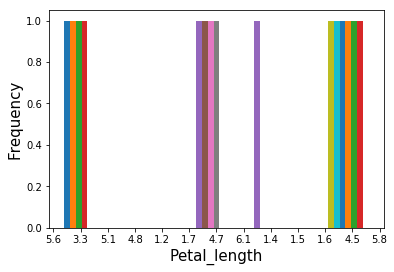

In [71]:
#your code here
import random;
import seaborn as sns;
def reservoir_sampling(stream,m):
    n=len(stream)
    i=0
    reservoir=[0]*m;
    for i in range(m):
        reservoir[i]=stream[i];
    while(i<n):
        j=random.randrange(i+1);
        if(j<m):
            reservoir[j]=stream[i];
        i=i+1
    print("Following are m randomly selected items"); 
    printArray(reservoir, m);
    print("histogram of the data")
    print_histogram(reservoir,m)
    return reservoir
     
def printArray(reservoir,m): 
    for i in range(m): 
        print(reservoir[i],end=" "); 
    print();        
 # Driver Code 

def print_histogram(reservoir,m):
    row,col=np.shape(reservoir)
    reservoir_df = pd.DataFrame(np.array(reservoir).reshape(15,5),columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'label'])
    print("df after converting \n\n",reservoir_df)
    newdf=reservoir_df['petal_length']
    
    print("df of petal length \n",newdf)
    plt.hist(newdf,bins=3)
    plt.xlabel("Petal_length", fontsize=15)
    plt.ylabel("Frequency",fontsize=15)
    
  
if __name__ == "__main__": 
    stream =data.values.tolist() ; 
    [list(l) for l in zip(*data.values)]
    n = len(stream); 
    m= 15; 
    reservoir_sampling(stream, m);  
    


### Question 3b: Stratified Sampling [20%]
1. Implement stratified sampling by class label, and within each stratum use the reservoir sampling function you implemented. [15%]
2. Run your stratified sampler with $M=5$ samples per class (so that we have 15 data points in total) and plot the histogram of the petal length feature for the sampled dataset [2.5%]
3. Do you observe any difference between the stratified and the non-stratified histograms? Which one resembles the original petal length distribution more closely? In order to answer this question you may want to run both sampling procedures a few times and observe which one gives a more accurate result on average. [2.5%]

      0
0   4.6
1   4.7
2   4.0
3   4.4
4   4.5
5   1.4
6   1.4
7   1.4
8   1.5
9   1.5
10  6.0
11  5.8
12  5.1
13  5.1
14  5.0


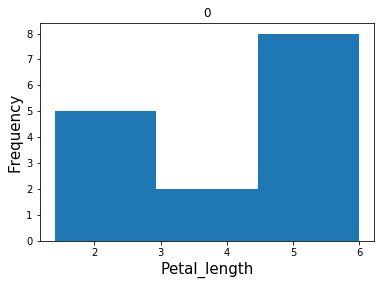

In [72]:
#your code here
#data.groupby('label', group_keys=False).apply(lambda x: x.sample(min(ln(x), 2)))
df1_strata=data.loc[(data['label']=='Iris-setosa')]
df2_strata=data.loc[(data['label']=='Iris-versicolor')]
df3_strata=data.loc[(data['label']=='Iris-veronica')]
#df1_reservoir=reservoir_sampling(df1_strata.values.tolist(),5)


def reservoir_sampling(stream, M): 
        i=0;  
        reservoir = [0]*M; 
        for i in range(M): 
            reservoir[i] = stream[i]; 
             
        while(i < len(stream)):
            j = random.randrange(i+1); 
            if(j < M): 
                reservoir[j] = stream[i]; 
            i+=1; 
        
        return reservoir
       

if __name__ == "__main__":
    
    
    x, y, z = [], [], []
    for index,row in data.iterrows():   
        #print(row['label'])
        if(row['label'] == 'Iris-versicolor'):
            x.append([i for i in row])
        if(row['label'] == 'Iris-setosa'):
            y.append([i for i in row])
        if(row['label'] == 'Iris-virginica'):
            z.append([i for i in row])
           
    M = 5; 
    result = []
    reservoir = reservoir_sampling(x, M);
    for i in reservoir:
        result.append(i[2])
        
    reservoir = reservoir_sampling(y, M);
    for i in reservoir:
        result.append(i[2])
    
    reservoir = reservoir_sampling(z, M);
    for i in reservoir:
        result.append(i[2])
    
    df = pd.DataFrame(result)
    print(df)
    ax = df.hist(bins = 3,grid=False)
    plt.xlabel("Petal_length", fontsize=15)
    plt.ylabel("Frequency",fontsize=15)



#print(df1)


3.Without stratifiation e can observe wide dispersion and hyge variance.So if we compare the two histograms of the petal_length , we can see that the majority of the petal_length lies in the range of 4.5-6 in bin 3 of the figure which causes the high variance. So with the help of stratification we can help reduce this variance

Your answer here:
3. 